In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip 'drive/MyDrive/DEEP_2024-1/TA/dataset.zip'

Se han truncado las √∫ltimas 5000 l√≠neas del flujo de salida.
  inflating: train/images/cardboard147_jpg.rf.30efb142a0aae74f1fef2b1ae46157fd.jpg  
  inflating: train/images/cardboard148_jpg.rf.0b290f4b230dd569ff67ff981674859d.jpg  
  inflating: train/images/cardboard15_jpg.rf.a5c2cd1a638edb96e6bccbd9e00f9e63.jpg  
  inflating: train/images/cardboard150_jpg.rf.59ab6bdd4ae098911068e9703a092abe.jpg  
  inflating: train/images/cardboard151_jpg.rf.15481cdd5831ba7cf58b631ef0b5965b.jpg  
  inflating: train/images/cardboard152_jpg.rf.e208e9762b63e2630ec0460c7798c70a.jpg  
  inflating: train/images/cardboard153_jpg.rf.d4ecdcc8e04589c3281835938689aa6e.jpg  
  inflating: train/images/cardboard154_jpg.rf.31e7650e5dc0e1beedc150048b9ec7fb.jpg  
  inflating: train/images/cardboard157_jpg.rf.f59ae991fc025b9f58e06b6456b33dfb.jpg  
  inflating: train/images/cardboard158_jpg.rf.71d0794ce1c4283d5fb66b04dd103139.jpg  
  inflating: train/images/cardboard159_jpg.rf.e4ad5c9faab61c7b312abd50b602af06.jpg  
  i

In [ ]:
# Instalar la biblioteca ultralytics
!pip install ultralytics

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 793.6/793.6 kB 7.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [ ]:
import os
directory_path = '/content/train'  # Reemplazar esto con la ruta al directorio

if os.path.exists(directory_path):
    print("El directorio existe.")
else:
    print("El directorio no existe.")

El directorio existe.


In [ ]:
from ultralytics import YOLO


model = YOLO("yolov8n.yaml")

model.train(data="config.yaml", epochs=100)
metrics = model.val()


Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=config.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 25.9MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.23M/6.23M [00:00<00:00, 134MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ‚úÖ


train: Scanning /content/train/labels... 2015 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2015/2015 [00:01<00:00, 1388.58it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels... 504 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 504/504 [00:00<00:00, 692.32it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ‚úÖ
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.58G      3.035      4.224      4.148         44        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:55<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:06<00:00,  2.52it/s]

                   all        504        505    0.00198      0.662     0.0106    0.00264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.26G      2.655       3.91      3.467         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:49<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  3.06it/s]

                   all        504        505     0.0156      0.247     0.0239    0.00757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.27G       2.13      3.481      2.815         45        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:45<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:08<00:00,  1.87it/s]

                   all        504        505      0.282      0.248     0.0706      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.27G       1.65      2.873      2.299         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:50<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.25it/s]

                   all        504        505      0.357       0.39       0.23      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.26G      1.338      2.432      1.973         49        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:48<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  2.67it/s]


                   all        504        505      0.424      0.494      0.276      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.26G      1.194      2.188      1.814         45        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:46<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.26it/s]

                   all        504        505      0.363      0.561      0.256      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.26G      1.117      2.054      1.734         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:50<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  2.87it/s]

                   all        504        505      0.382      0.666      0.351      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.26G      1.026      1.927      1.651         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:54<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.32it/s]

                   all        504        505      0.237      0.655      0.338      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.26G     0.9537      1.815      1.575         44        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:48<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:08<00:00,  1.97it/s]

                   all        504        505      0.386      0.634      0.339      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.26G     0.9355       1.78      1.553         30        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:45<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.23it/s]

                   all        504        505      0.408      0.555      0.374      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.26G     0.8957      1.721      1.516         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:47<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.29it/s]

                   all        504        505      0.414      0.594      0.399      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.26G     0.8561      1.668      1.468         47        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:50<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:08<00:00,  1.80it/s]

                   all        504        505      0.432      0.583      0.405       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.26G     0.8136      1.613      1.434         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  3.10it/s]

                   all        504        505      0.501       0.52       0.41      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.26G     0.7975      1.581      1.413         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:45<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  2.92it/s]

                   all        504        505      0.525      0.638      0.413      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.26G     0.7914      1.539      1.408         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.02it/s]

                   all        504        505      0.486       0.59      0.444      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.26G     0.7606      1.502      1.376         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:47<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.36it/s]

                   all        504        505      0.528      0.644      0.448      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.26G     0.7652      1.505      1.378         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.15it/s]

                   all        504        505      0.531      0.659      0.495      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.26G     0.7435      1.453      1.353         43        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.45it/s]

                   all        504        505      0.541      0.634      0.543      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.26G     0.7243      1.443      1.349         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:46<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:06<00:00,  2.58it/s]

                   all        504        505      0.534      0.579      0.518      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.26G     0.7205      1.436      1.343         30        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:06<00:00,  2.55it/s]

                   all        504        505      0.518      0.634       0.53      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.26G     0.7255      1.418      1.347         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:46<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.21it/s]

                   all        504        505      0.392      0.563       0.53      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.26G     0.6921      1.389      1.319         37        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:06<00:00,  2.38it/s]

                   all        504        505      0.577      0.603      0.544      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.26G     0.6929      1.345      1.319         43        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:46<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.61it/s]


                   all        504        505       0.59      0.649      0.601      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.26G     0.6986      1.322      1.326         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:46<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  2.71it/s]

                   all        504        505       0.62      0.617      0.592      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.26G     0.6831      1.332      1.315         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:50<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.10it/s]

                   all        504        505      0.616      0.612      0.634      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.26G     0.6545      1.303      1.284         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:45<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  3.05it/s]

                   all        504        505      0.705       0.62      0.656      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.26G     0.6732      1.261      1.297         37        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:48<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.54it/s]


                   all        504        505       0.67      0.622      0.643       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.26G     0.6476       1.24      1.283         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:45<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:08<00:00,  1.96it/s]

                   all        504        505      0.702      0.618      0.665      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.26G     0.6384      1.233       1.28         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:48<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.60it/s]

                   all        504        505      0.656      0.626       0.64      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.26G     0.6206      1.202      1.269         30        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:06<00:00,  2.56it/s]

                   all        504        505      0.735       0.62      0.669      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.26G     0.6388      1.216      1.273         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.71it/s]

                   all        504        505      0.653      0.638      0.629      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.26G      0.628      1.207      1.258         39        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.14it/s]

                   all        504        505      0.754      0.602      0.686      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.26G     0.6335       1.18      1.265         37        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:40<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  2.74it/s]

                   all        504        505      0.668      0.661      0.701      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.26G     0.6148      1.177      1.251         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.02it/s]

                   all        504        505      0.514       0.75       0.66      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.26G     0.6119      1.148       1.24         43        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.79it/s]

                   all        504        505      0.736      0.584      0.669      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.26G     0.6146      1.166      1.246         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:40<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:06<00:00,  2.46it/s]

                   all        504        505      0.657      0.709       0.71      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.26G     0.6112      1.164      1.239         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  2.77it/s]

                   all        504        505      0.742      0.574      0.674      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.26G     0.6008      1.117      1.238         46        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.65it/s]

                   all        504        505      0.719      0.651      0.677      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.26G     0.5934      1.122      1.233         29        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:40<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:06<00:00,  2.36it/s]

                   all        504        505      0.718       0.66      0.709       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.26G     0.5863      1.087       1.23         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.33it/s]

                   all        504        505      0.769      0.622      0.717      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.26G     0.5724      1.112      1.219         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.59it/s]

                   all        504        505      0.738      0.647      0.707      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.26G     0.5788      1.084       1.22         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.05it/s]


                   all        504        505      0.563      0.668      0.682      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.26G     0.5813      1.062      1.219         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.76it/s]

                   all        504        505      0.688      0.717       0.73      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.26G     0.5861      1.075      1.222         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:46<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.20it/s]

                   all        504        505      0.526      0.766       0.73      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.26G     0.5807      1.074      1.227         46        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:40<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.64it/s]

                   all        504        505      0.715      0.719      0.754      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.26G     0.5571       1.04      1.203         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  2.77it/s]

                   all        504        505      0.641      0.769      0.782      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.26G     0.5651      1.052      1.206         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  3.03it/s]

                   all        504        505      0.658       0.69      0.767      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.26G     0.5499      1.015      1.194         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.14it/s]

                   all        504        505      0.734      0.715      0.784      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.26G      0.558      1.037      1.204         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.79it/s]


                   all        504        505      0.719      0.678      0.759        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.26G     0.5684       1.02      1.207         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:40<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  2.80it/s]

                   all        504        505      0.555      0.747      0.722      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.26G     0.5596      1.009      1.206         37        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  2.72it/s]

                   all        504        505      0.643      0.761      0.791      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.26G     0.5353     0.9902      1.186         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.69it/s]

                   all        504        505      0.731      0.685      0.761      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.26G     0.5461     0.9769      1.195         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.23it/s]

                   all        504        505      0.709      0.765      0.802      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.26G     0.5446     0.9919       1.19         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.73it/s]


                   all        504        505      0.658      0.811      0.818      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.26G     0.5441     0.9751      1.195         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  2.87it/s]

                   all        504        505      0.694      0.777      0.817      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.26G     0.5503     0.9867      1.203         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  2.79it/s]

                   all        504        505      0.654      0.772       0.79      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.26G      0.539     0.9911      1.184         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.28it/s]

                   all        504        505      0.706       0.71      0.782      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.26G     0.5358       0.98      1.186         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:43<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.23it/s]

                   all        504        505      0.766      0.726      0.808      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.26G     0.5332     0.9501      1.188         37        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.84it/s]

                   all        504        505      0.709      0.845      0.837      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.26G     0.5115     0.9374      1.168         37        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.26it/s]

                   all        504        505      0.737      0.765      0.825       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.26G     0.5368     0.9521      1.184         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:06<00:00,  2.65it/s]

                   all        504        505      0.634      0.796      0.798      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.26G     0.5363     0.9373      1.191         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.67it/s]

                   all        504        505      0.684      0.734      0.812      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.26G     0.5234     0.9148      1.182         27        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:06<00:00,  2.32it/s]

                   all        504        505       0.65      0.759      0.805      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.26G     0.5062     0.9183      1.171         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.79it/s]

                   all        504        505       0.69      0.749      0.808      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.26G      0.516     0.8982      1.173         27        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.37it/s]

                   all        504        505      0.711       0.76       0.82      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.26G     0.5162     0.8986      1.181         44        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:06<00:00,  2.51it/s]

                   all        504        505      0.672      0.827      0.832      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.26G     0.5118     0.9005      1.175         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:43<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.75it/s]

                   all        504        505      0.678      0.822      0.845      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.26G     0.5224     0.9294      1.184         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.10it/s]

                   all        504        505      0.639      0.846      0.827       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.26G     0.5054     0.8756      1.168         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.68it/s]

                   all        504        505      0.691      0.803      0.844      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.26G      0.502       0.91      1.165         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.27it/s]

                   all        504        505      0.728      0.796       0.84      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.26G     0.5029      0.871      1.165         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:06<00:00,  2.66it/s]


                   all        504        505      0.706       0.79      0.831       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.26G     0.4957     0.8778      1.168         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:41<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.72it/s]

                   all        504        505      0.675      0.824      0.833      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.26G     0.4839     0.8528       1.15         39        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:08<00:00,  1.94it/s]

                   all        504        505      0.809      0.754      0.864      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.26G     0.4974     0.8477      1.164         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:45<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.54it/s]

                   all        504        505      0.721      0.826      0.852      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.26G     0.4879     0.8757      1.157         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:48<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  3.11it/s]

                   all        504        505      0.767      0.823       0.86      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.26G     0.4969     0.8634      1.165         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:49<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  2.81it/s]

                   all        504        505      0.786       0.74      0.846      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.26G     0.4902     0.8466      1.156         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:47<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  3.15it/s]

                   all        504        505      0.763      0.779      0.854      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.26G      0.478     0.8302      1.147         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:08<00:00,  1.99it/s]

                   all        504        505      0.792      0.775      0.872      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.26G     0.4761     0.8511      1.142         47        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:46<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.46it/s]

                   all        504        505      0.757      0.801       0.85      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.26G     0.4902     0.8436      1.156         30        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:47<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.25it/s]

                   all        504        505      0.802      0.797      0.876      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.26G     0.4861     0.8251      1.153         43        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.50it/s]

                   all        504        505      0.756      0.822      0.862      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.26G     0.4728     0.8126      1.144         49        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:47<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.30it/s]

                   all        504        505      0.811      0.802      0.878      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.26G     0.4824     0.8331      1.153         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:44<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.02it/s]

                   all        504        505      0.771      0.849      0.877      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.26G     0.4641     0.7991      1.136         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:45<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.46it/s]

                   all        504        505      0.831      0.785      0.874      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.26G     0.4658     0.7953      1.143         44        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:46<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.15it/s]

                   all        504        505      0.811      0.774      0.867      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.26G      0.476     0.7969      1.156         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:43<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:05<00:00,  2.99it/s]

                   all        504        505      0.811      0.814      0.879      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.26G      0.471     0.7955      1.148         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:47<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.43it/s]

                   all        504        505       0.76      0.861      0.875      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.26G     0.4697     0.7954      1.148         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:45<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.06it/s]

                   all        504        505      0.832      0.826      0.887      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.26G     0.4711     0.7944      1.149         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:45<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.47it/s]

                   all        504        505      0.785      0.813      0.866      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.26G     0.4574     0.7836      1.136         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:43<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:08<00:00,  1.91it/s]

                   all        504        505      0.786      0.844      0.878      0.835


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.39G     0.2874     0.5755       1.01         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:45<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.54it/s]


                   all        504        505       0.86      0.781      0.878      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.24G      0.284      0.534      1.007         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:42<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.18it/s]

                   all        504        505      0.808      0.813       0.88      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.26G      0.273     0.5142     0.9936         17        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:43<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.53it/s]

                   all        504        505      0.818      0.816      0.887      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.24G     0.2677     0.5144     0.9957         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:43<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.09it/s]

                   all        504        505       0.81      0.811      0.886      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.26G     0.2708     0.5152     0.9954         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:43<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.50it/s]

                   all        504        505      0.777      0.855      0.885       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.24G     0.2676     0.5015     0.9945         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:49<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:08<00:00,  1.97it/s]

                   all        504        505      0.804      0.826      0.887      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.26G     0.2631     0.4922     0.9859         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:43<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.46it/s]

                   all        504        505      0.836      0.835      0.894      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.24G     0.2595     0.4916     0.9913         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:40<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.14it/s]

                   all        504        505      0.822      0.843        0.9      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.26G     0.2627     0.5044     0.9904         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:43<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:04<00:00,  3.35it/s]

                   all        504        505       0.84      0.827      0.901      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.24G     0.2588     0.4669     0.9866         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 126/126 [00:46<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.04it/s]

                   all        504        505      0.818       0.85      0.901      0.862



100 epochs completed in 1.431 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:07<00:00,  2.05it/s]


                   all        504        505      0.841      0.827      0.901      0.862
             cardboard         84         84       0.88      0.869      0.957      0.927
                 glass         89         89      0.786      0.876      0.921      0.858
                 metal         86         86      0.896      0.837      0.945      0.936
                 paper        113        113      0.884      0.867      0.948      0.909
               plastic        103        103      0.954      0.809      0.938      0.887
                 trash         29         30      0.647        0.7      0.697      0.656
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/valid/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 504/504 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32/32 [00:08<00:00,  3.69it/s]


                   all        504        505      0.841      0.827      0.901      0.862
             cardboard         84         84       0.88       0.87      0.957      0.927
                 glass         89         89      0.786      0.876       0.92      0.858
                 metal         86         86      0.895      0.837      0.945      0.936
                 paper        113        113      0.884      0.867      0.948      0.909
               plastic        103        103      0.954      0.811      0.938      0.887
                 trash         29         30      0.645        0.7      0.698      0.657
Speed: 0.5ms preprocess, 5.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
results = model("metal.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format


image 1/1 /content/metal.jpg: 416x640 1 plastic, 1 trash, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 640)
Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ‚úÖ 0.9s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (2.5s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=config.yaml  
Visualize:       https://netron.app



image 1/1 /content/plastico2.jpg: 480x640 1 paper, 339.0ms
Speed: 3.9ms preprocess, 339.0ms inference, 12.2ms postprocess per image at shape (1, 3, 480, 640)


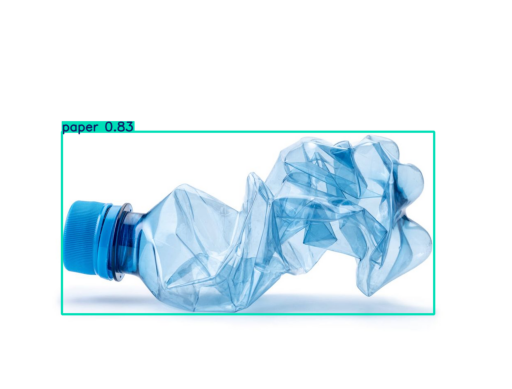

In [ ]:
results = model("plastico2.jpg")  # predict on an image

import matplotlib.pyplot as plt
import cv2
# Aseg√∫rate de que 'results' no est√© vac√≠o y es del tipo esperado
if results and isinstance(results, list):
    for result in results:
        # Renderizar la imagen con las predicciones
        img_with_boxes = result.plot()

        # Convertir la imagen de BGR a RGB (si es necesario)
        img_with_boxes_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen
        plt.imshow(img_with_boxes_rgb)
        plt.axis('off')  # Ocultar los ejes
        plt.show()
else:
    print("No se encontraron resultados.")


In [ ]:
!ls /content/runs


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
import shutil

folder_path = '/content/runs'
output_filename = '/content/runs.zip'

shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)


'/content/runs.zip'

In [ ]:
metrics = model.val()  # evaluar el rendimiento del modelo en el conjunto de validaci√≥n


Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/valid/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 504/504 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32/32 [00:08<00:00,  3.80it/s]


                   all        504        505      0.841      0.827      0.901      0.862
             cardboard         84         84       0.88       0.87      0.957      0.927
                 glass         89         89      0.786      0.876       0.92      0.858
                 metal         86         86      0.895      0.837      0.945      0.936
                 paper        113        113      0.884      0.867      0.948      0.909
               plastic        103        103      0.954      0.811      0.938      0.887
                 trash         29         30      0.645        0.7      0.698      0.657
Speed: 0.4ms preprocess, 4.2ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train3


In [ ]:
from ultralytics.utils.metrics import Metric
metrics = model.val()

# Inicializar Metric
metric = Metric()

# Actualizar las m√©tricas con los resultados de la evaluaci√≥n
metric.update(metrics)

# Acceder a diferentes m√©tricas
mAP = metric.map  # mAP sobre umbrales IoU de 0,5-0,95 en pasos de 0,05
ap50 = metric.ap50  # AP50 para todas las clases

Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/valid/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 504/504 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32/32 [00:09<00:00,  3.40it/s]


                   all        504        505      0.841      0.827      0.901      0.862
             cardboard         84         84       0.88       0.87      0.957      0.927
                 glass         89         89      0.786      0.876       0.92      0.858
                 metal         86         86      0.895      0.837      0.945      0.936
                 paper        113        113      0.884      0.867      0.948      0.909
               plastic        103        103      0.954      0.811      0.938      0.887
                 trash         29         30      0.645        0.7      0.698      0.657
Speed: 0.5ms preprocess, 4.4ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train5


TypeError: cannot unpack non-iterable DetMetrics object

In [ ]:
# Listar los resultados
!ls /content/runs

# Crear un archivo ZIP con los resultados
import shutil
folder_path = '/content/runs'
output_filename = '/content/runs.zip'
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)

# Evaluar el rendimiento del modelo en el conjunto de validaci√≥n nuevamente
metrics = model.val()
print("Validation Metrics:", metrics)

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
!apt-get update
!apt-get install -y locales
!locale-gen en_US.UTF-8
!update-locale LANG=en_US.UTF-8
import os
os.environ["LANG"] = "en_US.UTF-8"
os.environ["LC_ALL"] = "en_US.UTF-8"


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import shutil

In [ ]:
metrics = model.val()
print("Metrics:", metrics)

Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/valid/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 504/504 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32/32 [00:08<00:00,  3.89it/s]


                   all        504        505      0.841      0.827      0.901      0.862
             cardboard         84         84       0.88       0.87      0.957      0.927
                 glass         89         89      0.786      0.876       0.92      0.858
                 metal         86         86      0.895      0.837      0.945      0.936
                 paper        113        113      0.884      0.867      0.948      0.909
               plastic        103        103      0.954      0.811      0.938      0.887
                 trash         29         30      0.645        0.7      0.698      0.657
Speed: 0.3ms preprocess, 4.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train6
Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a1b1c2eda20>
curves: ['Prec


image 1/1 /content/metal.jpg: 416x640 1 plastic, 1 trash, 15.9ms
Speed: 3.4ms preprocess, 15.9ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 640)
Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ‚úÖ 0.9s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (2.5s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=config.yaml  
Visualize:       https://netron.app

image 1/1 /content/plastico2.jpg: 480x640 1 paper, 10.9ms
Speed: 2.5ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 

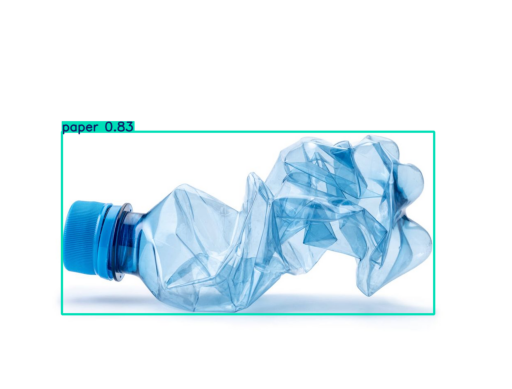

Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/valid/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 504/504 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32/32 [00:10<00:00,  2.97it/s]


                   all        504        505      0.841      0.827      0.901      0.862
             cardboard         84         84       0.88       0.87      0.957      0.927
                 glass         89         89      0.786      0.876       0.92      0.858
                 metal         86         86      0.895      0.837      0.945      0.936
                 paper        113        113      0.884      0.867      0.948      0.909
               plastic        103        103      0.954      0.811      0.938      0.887
                 trash         29         30      0.645        0.7      0.698      0.657
Speed: 0.5ms preprocess, 5.3ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train11
Validation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a1b24867e80>
cu

In [ ]:
results = model("metal.jpg")  # Predecir en una imagen
path = model.export(format="onnx")  # Exportar el modelo a formato ONNX

results = model("plastico2.jpg")  # Predecir en otra imagen

# Asegurarse de que 'results' no est√© vac√≠o y es del tipo esperado
if results and isinstance(results, list):
    for result in results:
        # Renderizar la imagen con las predicciones
        img_with_boxes = result.plot()

        # Convertir la imagen de BGR a RGB (si es necesario)
        img_with_boxes_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen
        plt.imshow(img_with_boxes_rgb)
        plt.axis('off')  # Ocultar los ejes
        plt.show()
else:
    print("No se encontraron resultados.")

# Listar los resultados
os.system('ls /content/runs')

# Crear un archivo ZIP con los resultados
folder_path = '/content/runs'
output_filename = '/content/runs.zip'
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)

# Evaluar el rendimiento del modelo en el conjunto de validaci√≥n nuevamente
metrics = model.val()
print("Validation Metrics:", metrics)

In [ ]:
# Listar los resultados
os.system('ls /content/runs')

# Crear un archivo ZIP con los resultados
folder_path = '/content/runs'
output_filename = '/content/runs.zip'
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)

# Evaluar el rendimiento del modelo en el conjunto de validaci√≥n nuevamente
metrics = model.val()
print("Validation Metrics:", metrics)

# Cargar las m√©tricas de entrenamiento desde el archivo CSV
train_metrics = pd.read_csv('/content/train_metrics.csv')

# Graficar las m√©tricas de entrenamiento
plt.figure(figsize=(12, 6))

# P√©rdida de entrenamiento
plt.subplot(1, 2, 1)
plt.plot(train_metrics['epoch'], train_metrics['train/loss'], label='Train Loss')
plt.plot(train_metrics['epoch'], train_metrics['val/loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Precisi√≥n de entrenamiento
plt.subplot(1, 2, 2)
plt.plot(train_metrics['epoch'], train_metrics['metrics/precision'], label='Precision')
plt.plot(train_metrics['epoch'], train_metrics['metrics/recall'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Precision and Recall')
plt.legend()

plt.tight_layout()
plt.show()

Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/valid/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 504/504 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32/32 [00:10<00:00,  3.06it/s]


                   all        504        505      0.841      0.827      0.901      0.862
             cardboard         84         84       0.88       0.87      0.957      0.927
                 glass         89         89      0.786      0.876       0.92      0.858
                 metal         86         86      0.895      0.837      0.945      0.936
                 paper        113        113      0.884      0.867      0.948      0.909
               plastic        103        103      0.954      0.811      0.938      0.887
                 trash         29         30      0.645        0.7      0.698      0.657
Speed: 0.4ms preprocess, 5.4ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train8
Validation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a1b249f9540>
cur

FileNotFoundError: [Errno 2] No such file or directory: '/content/train_metrics.csv'

In [ ]:
# Listar los resultados
os.system('ls /content/runs')

# Crear un archivo ZIP con los resultados
folder_path = '/content/runs'
output_filename = '/content/runs.zip'
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)

# Evaluar el rendimiento del modelo en el conjunto de validaci√≥n nuevamente
metrics = model.val()
print("Validation Metrics:", metrics)

# Cargar las m√©tricas de entrenamiento desde el archivo CSV
if os.path.exists('/content/train_metrics.csv'):
    train_metrics = pd.read_csv('/content/train_metrics.csv')
    print("Metrics loaded successfully")
else:
    print("Metrics file not found")

# Mostrar las primeras filas del archivo CSV para verificar su contenido
print(train_metrics.head())

# Graficar las m√©tricas de entrenamiento
plt.figure(figsize=(12, 6))

# P√©rdida de entrenamiento
plt.subplot(1, 2, 1)
plt.plot(train_metrics['epoch'], train_metrics['train/loss'], label='Train Loss')
plt.plot(train_metrics['epoch'], train_metrics['val/loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Precisi√≥n de entrenamiento
plt.subplot(1, 2, 2)
plt.plot(train_metrics['epoch'], train_metrics['metrics/precision'], label='Precision')
plt.plot(train_metrics['epoch'], train_metrics['metrics/recall'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Precision and Recall')
plt.legend()

plt.tight_layout()
plt.show()

Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/valid/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 504/504 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32/32 [00:08<00:00,  3.70it/s]


                   all        504        505      0.841      0.827      0.901      0.862
             cardboard         84         84       0.88       0.87      0.957      0.927
                 glass         89         89      0.786      0.876       0.92      0.858
                 metal         86         86      0.895      0.837      0.945      0.936
                 paper        113        113      0.884      0.867      0.948      0.909
               plastic        103        103      0.954      0.811      0.938      0.887
                 trash         29         30      0.645        0.7      0.698      0.657
Speed: 0.3ms preprocess, 4.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train9
Validation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a1b24bfb0d0>
cur

NameError: name 'train_metrics' is not defined

In [ ]:

# Listar los resultados
os.system('ls /content/runs')

# Crear un archivo ZIP con los resultados
folder_path = '/content/runs'
output_filename = '/content/runs.zip'
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)

# Evaluar el rendimiento del modelo en el conjunto de validaci√≥n nuevamente
metrics = model.val()
print("Validation Metrics:", metrics)

# Verificar que el archivo CSV se haya creado
if os.path.exists('/content/train_metrics.csv'):
    print("El archivo CSV de m√©tricas existe y se puede cargar.")
    train_metrics = pd.read_csv('/content/train_metrics.csv')
    print("Metrics loaded successfully")
else:
    print("Metrics file not found")

# Mostrar las primeras filas del archivo CSV para verificar su contenido
if 'train_metrics' in locals():
    print(train_metrics.head())
else:
    print("La variable train_metrics no est√° definida. No se pudo cargar el archivo CSV.")

# Graficar las m√©tricas de entrenamiento si se han cargado correctamente
if 'train_metrics' in locals():
    plt.figure(figsize=(12, 6))

    # P√©rdida de entrenamiento
    plt.subplot(1, 2, 1)
    plt.plot(train_metrics['epoch'], train_metrics['train/loss'], label='Train Loss')
    plt.plot(train_metrics['epoch'], train_metrics['val/loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Precisi√≥n de entrenamiento
    plt.subplot(1, 2, 2)
    plt.plot(train_metrics['epoch'], train_metrics['metrics/precision'], label='Precision')
    plt.plot(train_metrics['epoch'], train_metrics['metrics/recall'], label='Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Metrics')
    plt.title('Precision and Recall')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("No se pudieron graficar las m√©tricas porque no se cargaron correctamente.")

Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/valid/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 504/504 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32/32 [00:14<00:00,  2.22it/s]


                   all        504        505      0.841      0.827      0.901      0.862
             cardboard         84         84       0.88       0.87      0.957      0.927
                 glass         89         89      0.786      0.876       0.92      0.858
                 metal         86         86      0.895      0.837      0.945      0.936
                 paper        113        113      0.884      0.867      0.948      0.909
               plastic        103        103      0.954      0.811      0.938      0.887
                 trash         29         30      0.645        0.7      0.698      0.657
Speed: 0.9ms preprocess, 6.2ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train12
Validation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a1b2eabf970>
cu

Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/valid/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 504/504 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32/32 [00:11<00:00,  2.74it/s]


                   all        504        505      0.841      0.827      0.901      0.862
             cardboard         84         84       0.88       0.87      0.957      0.927
                 glass         89         89      0.786      0.876       0.92      0.858
                 metal         86         86      0.895      0.837      0.945      0.936
                 paper        113        113      0.884      0.867      0.948      0.909
               plastic        103        103      0.954      0.811      0.938      0.887
                 trash         29         30      0.645        0.7      0.698      0.657
Speed: 0.7ms preprocess, 5.2ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train14
Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a1b251018d0>
curves: ['Pre

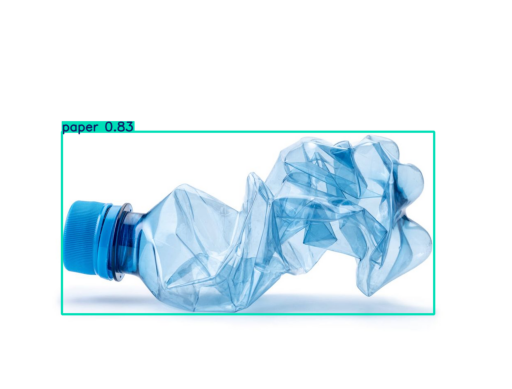

Ultralytics YOLOv8.2.45 üöÄ Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/valid/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 504/504 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32/32 [00:09<00:00,  3.20it/s]


                   all        504        505      0.841      0.827      0.901      0.862
             cardboard         84         84       0.88       0.87      0.957      0.927
                 glass         89         89      0.786      0.876       0.92      0.858
                 metal         86         86      0.895      0.837      0.945      0.936
                 paper        113        113      0.884      0.867      0.948      0.909
               plastic        103        103      0.954      0.811      0.938      0.887
                 trash         29         30      0.645        0.7      0.698      0.657
Speed: 0.5ms preprocess, 4.6ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train15
Validation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a1b1c1d8d90>
cu

KeyError: 'metrics/precision(B)'

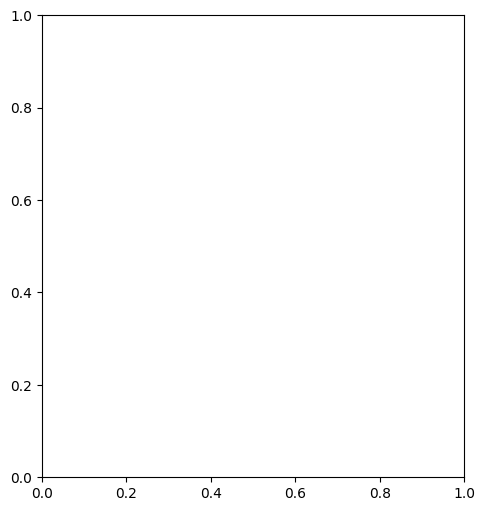

In [ ]:
# Evaluar el rendimiento del modelo en el conjunto de validaci√≥n
metrics = model.val()
print("Metrics:", metrics)

# Guardar las m√©tricas de entrenamiento en un archivo CSV
metrics_dict = metrics.results_dict
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index')
metrics_df.to_csv('/content/train_metrics.csv', index=False)
print("Metrics saved to CSV")

# Realizar predicciones en im√°genes de prueba
results = model("metal.jpg")  # Predecir en una imagen
path = model.export(format="onnx")  # Exportar el modelo a formato ONNX

results = model("plastico2.jpg")  # Predecir en otra imagen

# Asegurarse de que 'results' no est√© vac√≠o y es del tipo esperado
if results and isinstance(results, list):
    for result in results:
        # Renderizar la imagen con las predicciones
        img_with_boxes = result.plot()

        # Convertir la imagen de BGR a RGB (si es necesario)
        img_with_boxes_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen
        plt.imshow(img_with_boxes_rgb)
        plt.axis('off')  # Ocultar los ejes
        plt.show()
else:
    print("No se encontraron resultados.")

# Listar los resultados
os.system('ls /content/runs')

# Crear un archivo ZIP con los resultados
folder_path = '/content/runs'
output_filename = '/content/runs.zip'
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)

# Evaluar el rendimiento del modelo en el conjunto de validaci√≥n nuevamente
metrics = model.val()
print("Validation Metrics:", metrics)

# Verificar que el archivo CSV se haya creado
if os.path.exists('/content/train_metrics.csv'):
    print("El archivo CSV de m√©tricas existe y se puede cargar.")
    train_metrics = pd.read_csv('/content/train_metrics.csv')
    print("Metrics loaded successfully")
else:
    print("Metrics file not found")

# Mostrar las primeras filas del archivo CSV para verificar su contenido
if 'train_metrics' in locals():
    print(train_metrics.head())
else:
    print("La variable train_metrics no est√° definida. No se pudo cargar el archivo CSV.")

# Graficar las m√©tricas de entrenamiento si se han cargado correctamente
if 'train_metrics' in locals():
    plt.figure(figsize=(12, 6))

    # P√©rdida de entrenamiento
    plt.subplot(1, 2, 1)
    plt.plot(train_metrics.index, train_metrics['metrics/precision(B)'], label='Precision')
    plt.plot(train_metrics.index, train_metrics['metrics/recall(B)'], label='Recall')
    plt.xlabel('Index')
    plt.ylabel('Metrics')
    plt.title('Precision and Recall')
    plt.legend()

    # Precisi√≥n de entrenamiento
    plt.subplot(1, 2, 2)
    plt.plot(train_metrics.index, train_metrics['metrics/mAP50(B)'], label='mAP50')
    plt.plot(train_metrics.index, train_metrics['metrics/mAP50-95(B)'], label='mAP50-95')
    plt.xlabel('Index')
    plt.ylabel('Metrics')
    plt.title('mAP50 and mAP50-95')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("No se pudieron graficar las m√©tricas porque no se cargaron correctamente.")
